## Predict Product Backorders


In this project, the goal is to identify the cause of backorder and use the past data around the backorders to develop a model to predict the probability of a product backorder.
With the help of data analysis, a reasonable prediction on all products can go on backorders is expected. Such a prediction
could immensely help the client to plan for a more efficient stocking and backorder handling.
Goals of this project are:  

- Provide an overall insight from data using exploratory data analysis. 

- Identifying what the main features are caused backorders the most?  

- Predict the probability of a product backorder.    


### Data:
With the help of data analysis, a reasonable prediction on the products that can go on backorder is expected. Such a prediction could immensely help the client to plan for a more efficient stocking and backorder handling.
Using the dataset, I want to answer to main questions:  

1. How common is backorder?

2. What is the relationship of features with backorders?  

3. Based on backorder risks what would be biggest risks?  


Answers to these questions will enable me to identify the main causes of backorders and predict the probability of backorders.  


Dataset was acquired from https://www.kaggle.com/tiredgeek/predict-bo-trial. Dataset composed of one file named "Training_Dataset."The training file was opened and stored in a data frame using python.


##### Data Visualization

In [1]:
import decimal

import pandas as pd
import numpy as np

from scipy import stats

from sklearn.preprocessing import Imputer
from sklearn.preprocessing import normalize
from sklearn import preprocessing

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn import tree, ensemble
from sklearn.linear_model import Ridge

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score


In this dataset, every categorical feature includes only two values: 'Yes' and 'No' for reducing memory usage binaries converted from strings ('Yes' and 'No') to 1 and 0.

In [2]:
backorder_file = pd.read_csv("Kaggle_Training_Dataset_v2.csv")

orders = (backorder_file
              .drop(backorder_file.index[len(backorder_file)-1])# drop invalid last row
              .replace(['Yes', 'No'], [1, 0]))               # make yes/no numeric

C:\Users\Hedi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
orders.tail()
#data Information
orders.info()
#data description
orders.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1687860 entries, 0 to 1687859
Data columns (total 23 columns):
sku                  1687860 non-null object
national_inv         1687860 non-null float64
lead_time            1586967 non-null float64
in_transit_qty       1687860 non-null float64
forecast_3_month     1687860 non-null float64
forecast_6_month     1687860 non-null float64
forecast_9_month     1687860 non-null float64
sales_1_month        1687860 non-null float64
sales_3_month        1687860 non-null float64
sales_6_month        1687860 non-null float64
sales_9_month        1687860 non-null float64
min_bank             1687860 non-null float64
potential_issue      1687860 non-null int64
pieces_past_due      1687860 non-null float64
perf_6_month_avg     1687860 non-null float64
perf_12_month_avg    1687860 non-null float64
local_bo_qty         1687860 non-null float64
deck_risk            1687860 non-null int64
oe_constraint        1687860 non-null int64
ppap_risk           

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,1.687860e+06,1.586967e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,...,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06
mean,4.961118e+02,7.872267e+00,4.405202e+01,1.781193e+02,3.449867e+02,5.063644e+02,5.592607e+01,1.750259e+02,3.417288e+02,5.252697e+02,...,2.043724e+00,-6.872059e+00,-6.437947e+00,6.264507e-01,2.295706e-01,1.451542e-04,1.207648e-01,9.638086e-01,4.330928e-04,6.690721e-03
std,2.961523e+04,7.056024e+00,1.342742e+03,5.026553e+03,9.795152e+03,1.437892e+04,1.928196e+03,5.192378e+03,9.613167e+03,1.483861e+04,...,2.360165e+02,2.655636e+01,2.584333e+01,3.372224e+01,4.205568e-01,1.204713e-02,3.258538e-01,1.867661e-01,2.080638e-02,8.152275e-02
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,...,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,...,0.000000e+00,9.700000e-01,9.500000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.427612e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,...,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


### Data Preparation

The dataset contains the historical data, and it has 23 columns and 1687860 entries, and entirely has 100894 missing data also some entries of two columns include -99 values.

In [4]:
#missing values in product
orders.sku.isnull().sum()

0

In [5]:
#missing value 
orders.isnull().sum()

sku                       0
national_inv              0
lead_time            100893
in_transit_qty            0
forecast_3_month          0
forecast_6_month          0
forecast_9_month          0
sales_1_month             0
sales_3_month             0
sales_6_month             0
sales_9_month             0
min_bank                  0
potential_issue           0
pieces_past_due           0
perf_6_month_avg          0
perf_12_month_avg         0
local_bo_qty              0
deck_risk                 0
oe_constraint             0
ppap_risk                 0
stop_auto_buy             0
rev_stop                  0
went_on_backorder         0
dtype: int64

###### Target Value analysis

The calculation below shows how to handle missing data in "lead time":  

1.Proportion of orders that “went_on_backorder” for missing "lead_time" records.  

2.Proportion of orders that “went_on_backorder” for non-null "lead_time" records.  

Went on backorder percentage for all orders that they "went on backorder" is 0.66%. 

In [6]:
prob=len(orders[orders.went_on_backorder==1])/len(orders.sku)
print((prob*100),'%')
print(len(orders[orders.went_on_backorder==1]))


0.6690720794378681 %
11293


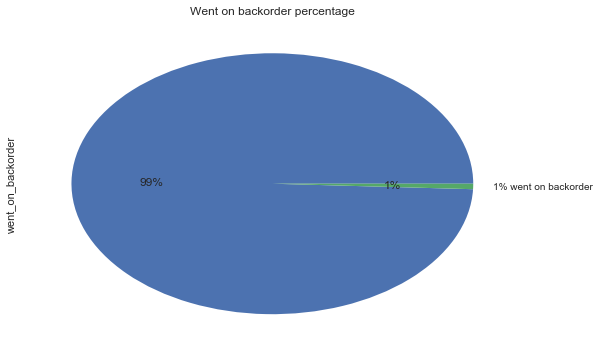

In [7]:
orders.went_on_backorder.value_counts().plot(kind='pie', autopct='%1.0f%%',labels=['','1% went on backorder'],figsize=(9,6),subplots=True)
plt.title('Went on backorder percentage')
plt.show()

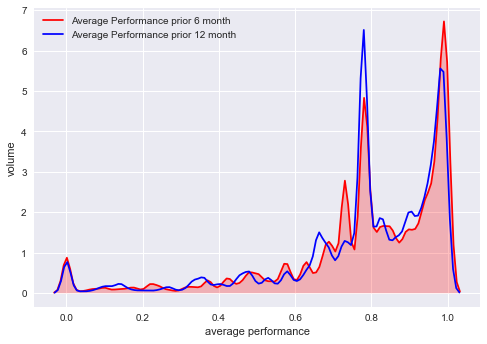

In [155]:
sns.kdeplot((orders['perf_6_month_avg']),color='r', shade=True,label='Average Performance prior 6 month')
sns.kdeplot((orders['perf_12_month_avg']),color='b', shade=False,label='Average Performance prior 12 month')
plt.xlabel('average performance')
plt.ylabel('volume')
plt.show()

All columns in dataset footer had missing values and represented as NaN, so I dropped that row.
Columns "perf_12_month_avg" and "perf_6_month_avg" have missing value as -99.There is a strong correlation between "perf_6_month_avg" and "perf_12_month_avg". So, linear regression would use to
filing missing values. However another interesting point to note here is that many observations have both "perf_12_month_avg" and "perf_6_month_avg" as null, so linear regression cannot fill such values, and we need to see 
another approach there. Probably we would like to check for the central tendency of the data and replace the null accordingly. 
<br>
It is visible from the seaborne plot that data was not distribute normally. Therefore picking median to fill remaining values is a good choice.  

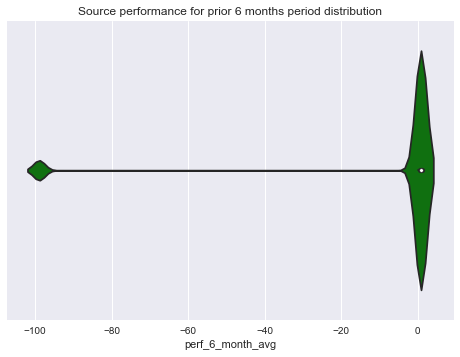

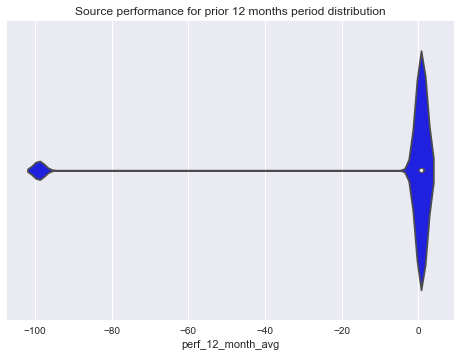

In [9]:
sns.violinplot(orders.perf_6_month_avg,color='g')
plt.title('Source performance for prior 6 months period distribution')
plt.show()
sns.violinplot(orders.perf_12_month_avg,color='b')
plt.title('Source performance for prior 12 months period distribution')
plt.show()

In [10]:
#replacing -99 missing values to mean
for col in ['perf_6_month_avg', 'perf_12_month_avg']:
    orders[col] = Imputer(missing_values=-99).fit_transform(
                                    orders[col].values.reshape(-1, 1))

"Lead_time" column had 100893 missing values, and it was not clear if it was missing or not. It is quite likely that when "lead 
time" is missing, it is missing for a reason and not at random, which means a mean/median imputation strategy may not be 
appropriate. I preferred to decide by looking at data with calculating the proportion of backordered products vs. without a 
missing value in "lead time."  


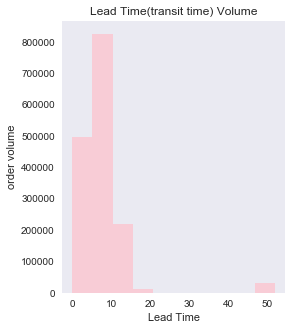

In [11]:
orders['lead_time'].hist(figsize=(4,5), alpha=0.7, color='pink', grid=False)
plt.xlabel('Lead Time')
plt.ylabel('order volume')
plt.title('Lead Time(transit time) Volume')
plt.show()

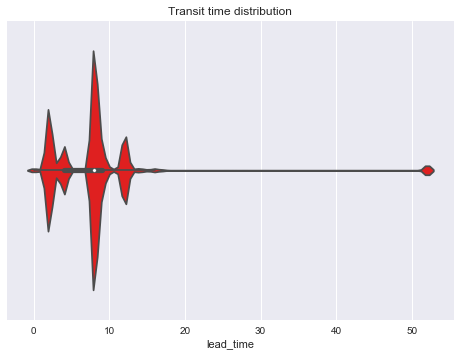

In [12]:
sns.violinplot(orders.lead_time,color='r')
plt.title('Transit time distribution')
plt.show()

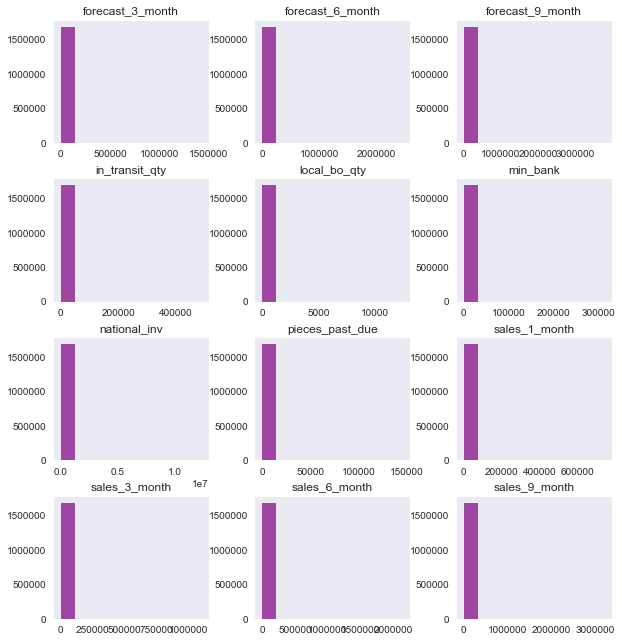

In [13]:
qty_related = ['national_inv', 'in_transit_qty', 'forecast_3_month', 
                   'forecast_6_month', 'forecast_9_month', 'min_bank',
                   'local_bo_qty', 'pieces_past_due', 'sales_1_month', 
                   'sales_3_month', 'sales_6_month', 'sales_9_month',]
orders[qty_related].hist(figsize=(10,11), alpha=0.7, color='purple', grid=False)
plt.show()


###### Lead Time and Went on backorder

check the missing data in lead time to replace it or not?
1. Proportion of orders that “went_on_backorder” for missing lead_time records
2. Proportion of orders that “went_on_backorder” for non-null lead_time records

In [14]:
n_null_leadTime = orders[orders['lead_time'].isnull()].shape[0]
print ('number of orders with missing lead time:', orders[orders['lead_time'].isnull()].shape[0])
n_non_null_leadTime = orders[orders['lead_time'].notnull()].shape[0]
print ('number of orders without missing lead time:',orders[orders['lead_time'].notnull()].shape[0])
n_null_leadTime_backorders =sum(orders[np.isnan(orders["lead_time"])]["went_on_backorder"])
print ('Number of backordered products with misssing lead time:', n_null_leadTime_backorders)
n_non_null_leadTime_backorders = sum(orders[pd.notnull(orders["lead_time"])]["went_on_backorder"])
print  ('Number of backordered products without misssing lead time:',n_non_null_leadTime_backorders)
print ('Total orders went on backorders:',n_null_leadTime_backorders+ n_non_null_leadTime_backorders)
null_leadTime_backorder_ratio = n_null_leadTime_backorders / float(n_null_leadTime)
non_null_leadTime_backorder_ratio = n_non_null_leadTime_backorders / float(n_non_null_leadTime)
print('Proportion of orders without missing lead time that went_on_backorder:',non_null_leadTime_backorder_ratio * 100)
print('Proportion of orders with missing lead_time that went_on_backorder :', null_leadTime_backorder_ratio * 100)


number of orders with missing lead time: 100893
number of orders without missing lead time: 1586967
Number of backordered products with misssing lead time: 324
Number of backordered products without misssing lead time: 10969
Total orders went on backorders: 11293
Proportion of orders without missing lead time that went_on_backorder: 0.691192696508
Proportion of orders with missing lead_time that went_on_backorder : 0.321132288662


Based on the above calculations the proportion of backordered products with missing lead time is 50% less than those without missing lead time.
The proportion of backordere products with missing lead time is half of the products with no missing values, therefore I decided not to replace the missing data in lead time and droping them.
Plot below shows the density of products for a given lead time that went on backorder and did not go on backorder.

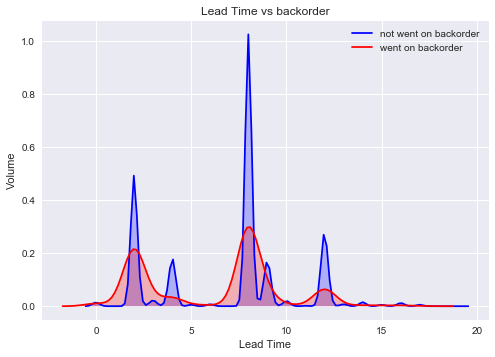

In [15]:
#Relationship between lead time and went on backorder
sns.kdeplot(orders[(orders['went_on_backorder'] == 0) & (orders['lead_time'] < 20)]['lead_time'],color='b', shade=True,label='not went on backorder',)
sns.kdeplot(orders[(orders['went_on_backorder'] == 1) & (orders['lead_time'] < 20)]['lead_time'], color='r',shade=True,label='went on backorder')
plt.title('Lead Time vs backorder')
plt.ylabel('Volume')
plt.xlabel('Lead Time')
plt.show()

Here we can see that both backorder and not backorder products have the same peak Lead time, because the orders on that particular lead time are high. However, the backorder plot is lower than not backorder plot.
You can see that plot of lead time is exactly look like the plot of lead time with not backorder data it means that most of the products are not going on backorder and if we choose the random sample of data it will be the same distribution.
Therefore we are going to see if lead time and went on backorder are independent or dependent from each other.
Next step is looking at the relationship between lead time and a fraction of products that went on backorder.
Let's look at the lead time and how it changes the probability of went to backorder.

##### Highest Transit time for product
Products that went on bacorder with lead time 8 weeks and then 2 weeks have the highest order volumes.

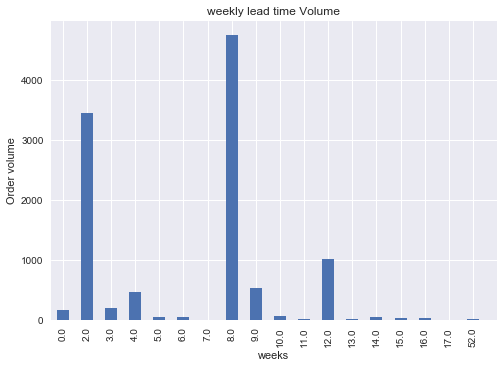

In [16]:
backorder_df=orders[orders['went_on_backorder']==1]
weekdist=backorder_df['lead_time'].value_counts().sort_index()
weekdist.plot(kind='bar')
_=plt.xlabel('weeks')
_=plt.ylabel('Order volume')
_=plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])
plt.title('weekly lead time Volume')
plt.show()


In [17]:
## These are the peak weeks
weekdist[weekdist>1000].sort_values(ascending=False)

8.0     4744
2.0     3457
12.0    1024
Name: lead_time, dtype: int64

#### Handing outliers

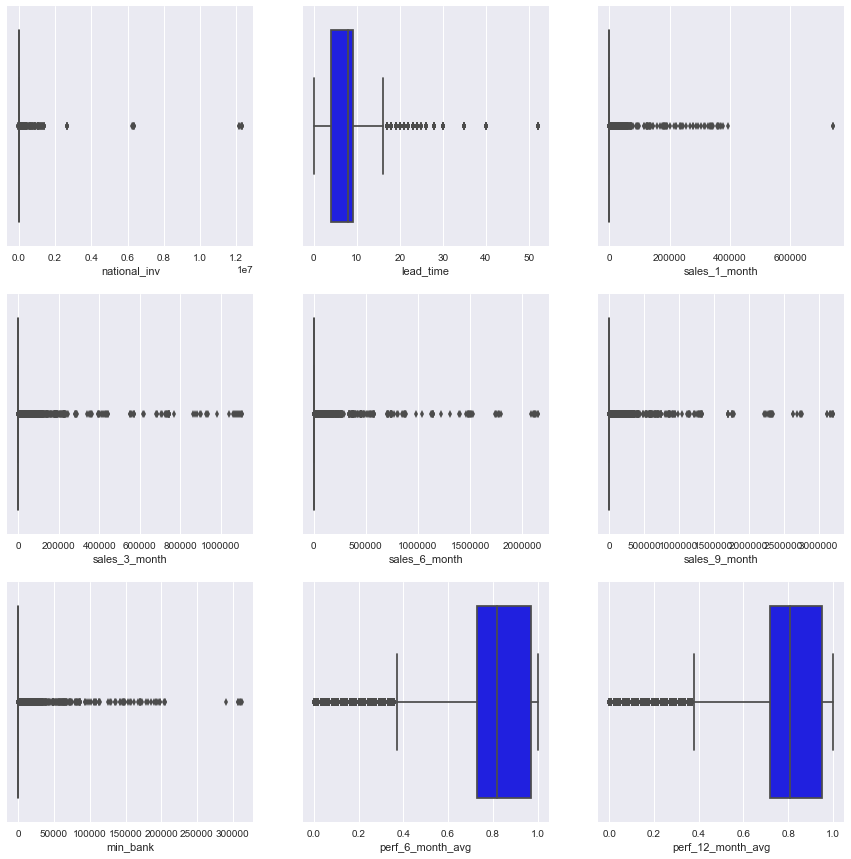

In [18]:
fig , ax1 = plt.subplots(nrows=3, ncols=3,figsize=(15,15))
sns.boxplot(orders.national_inv, ax=ax1[0,0],color='b' )
sns.boxplot(orders.lead_time, ax=ax1[0,1],color='b' )
sns.boxplot(orders.sales_1_month,ax=ax1[0,2],color='b' )
sns.boxplot(orders.sales_3_month, ax=ax1[1,0])
sns.boxplot(orders.sales_6_month, ax=ax1[1,1])
sns.boxplot(orders.sales_9_month, ax=ax1[1,2])
sns.boxplot(orders.min_bank, ax=ax1[2,0])
sns.boxplot(orders.perf_6_month_avg, ax=ax1[2,1],color='b' )
sns.boxplot(orders.perf_12_month_avg, ax=ax1[2,2],color='b' )
plt.show()

#sns.violinplot(df.transit_duration,  ax=ax1[1])
#sns.plt.title('transit_quantity range and distribution')

Products that "went on backorder" with "lead
time" eight weeks and then two weeks have the highest order volumes. The plot below shows the relation between "lead time" and the fraction of backorder.  

The Figure 4 plot shows with longer "lead time" backorder proportion goes down.

[[ 1.        -0.5420028]
 [-0.5420028  1.       ]]


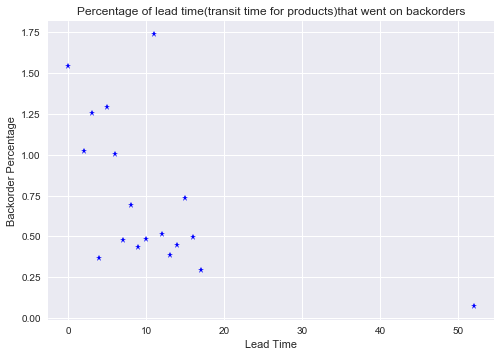

[1.5412425078489203, 1.0245938079797985, 1.2551528948501816, 0.36954339995487684, 1.2900024807740016, 1.006523765144455, 0.4784688995215311, 0.6954115153345275, 0.43348510703685433, 0.48618940248027059, 1.7367458866544789, 0.51276915373059584, 0.38852913968547642, 0.44599573395384917, 0.73452256033578167, 0.49756869840551843, 0.29231995748073347, 0.073058147643874735]


,lead_b,lead_n
0.0,162.0,10349
2.0,3457.0,333945
3.0,204.0,16049
4.0,475.0,128062
5.0,52.0,3979
6.0,54.0,5311
7.0,1.0,208
8.0,4744.0,677442
9.0,536.0,123113
10.0,69.0,14123


In [19]:
b=orders[['went_on_backorder','lead_time']]
backorder=b[b.went_on_backorder==1]
no_backorder=b[b.went_on_backorder==0]
lead_b=backorder.lead_time.value_counts()
lead_n=no_backorder.lead_time.value_counts()
c=[]
df1 = pd.DataFrame(
    {
     'lead_b': lead_b,
     'lead_n':lead_n
    })

df1=df1[['lead_b','lead_n']].dropna()


for i in range(0,len(df1)):
    backorder_ratio=(df1.lead_b.iloc[i])/(df1.lead_n.iloc[i]+df1.lead_b.iloc[i])
    backorder_ratio=backorder_ratio*100
    c.append(backorder_ratio)


print(np.corrcoef(df1.index.values,c))

plt.plot(df1.index.values,c,"*",color="blue")
plt.title('Percentage of lead time(transit time for products)that went on backorders')
_=plt.xlabel('Lead Time')
_=plt.ylabel('Backorder Percentage')
#plt.plot(np.array(range(len(c))) * 0.25, c,".")
plt.show()
print(c)
df1


In the above plot, two outlier are noticed. one is at lead time=11 and one at lead time 52. 
for the point on 52 I belive there was not enough records to show the rest of point between17 to 52.
the point at lead time 11 should be given special attention till its cause is known.
fo this reason I am going to calulate the probability bionomial distribution.

In [20]:
from scipy.stats import binom
import math
s = binom.pmf(19, 1094,0.01)
print(s)
sd=math.sqrt(1094 * 0.01 * (1 - 0.01))
print("Standard deviation ",sd)
print ((19 - 10.94)/sd)

0.00786682435841
Standard deviation  3.2909876936871094
2.449112774095443


As you see from the above calculations standard deviation of bionomial distribution is 3.23 standard deviation from the mean so I am going to ignore this point for now.

### Data Reduction:
Cumulative percentage is one way of expressing frequency distribution. 
The cumulative sum is the cumulative sum of differences between the values and the average.  Because the average is subtracted from each value, the cumulative sum also ends at zero. In this dataset, I considered sales_9_month as total sales.


In [21]:
sales_sort=orders.sort_values('sales_9_month',ascending = False)

C:\Users\Hedi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


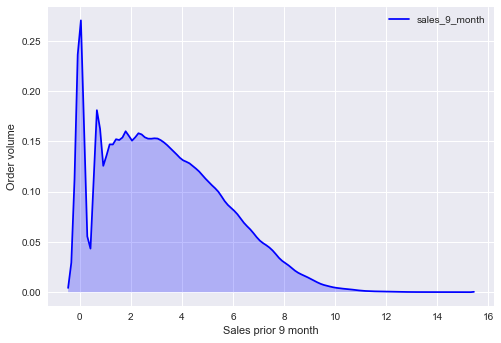

In [22]:
sns.kdeplot(np.log(sales_sort['sales_9_month']),color='b', shade=True)
plt.ylabel('Order volume')
plt.xlabel('Sales prior 9 month')
plt.show()

###### Total sales and went on backorder

[[ 1.          0.90766073]
 [ 0.90766073  1.        ]]


C:\Users\Hedi\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log


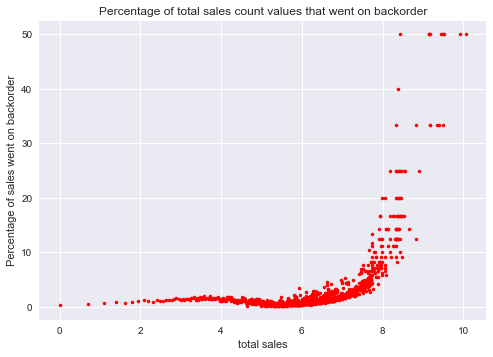

In [23]:
#relationship between sales and backorder
backorder_sales=sales_sort[sales_sort.went_on_backorder==1]
no_backorder_sales=sales_sort[sales_sort.went_on_backorder==0]
sales_b=backorder_sales.sales_9_month.value_counts()
sales_n=no_backorder_sales.sales_9_month.value_counts()
g=[]
df2 = pd.DataFrame(
    {
     'sales_b': sales_b,
     'sales_n':sales_n
    })

df2=df2[['sales_b','sales_n']].dropna()


for i in range(0,len(df2)):
    backorder_ratio=(df2.sales_b.iloc[i])/(df2.sales_n.iloc[i]+df2.sales_b.iloc[i])
    backorder_ratio=backorder_ratio*100
    g.append(backorder_ratio)


print(np.corrcoef(df2.index.values,g))
#plt.plot(np.array(range(len(g))) * 0.25, g,".",color='red')
plt.plot(np.log(df2.index.values), g,".",color='red')
plt.title('Percentage of total sales count values that went on backorder')
plt.xlabel('total sales')
plt.ylabel('Percentage of sales went on backorder')
plt.show()


883338607.0
530003164.2


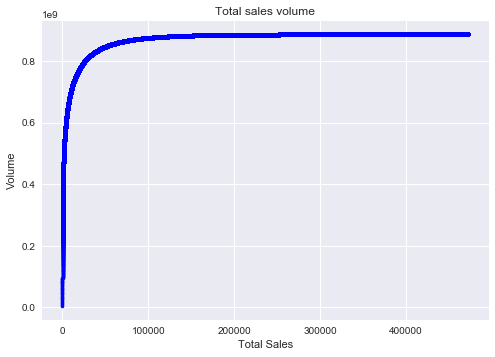

In [24]:
sales_volume =np.cumsum(sales_sort.sales_9_month)
print(sales_volume[len(sales_volume)-1])
print(0.6 * sales_volume[len(sales_volume)-1])
plt.plot(np.array(range(len(sales_sort))) * 0.28, sales_volume,".",color="blue")
plt.title('Total sales volume')
plt.xlabel('Total Sales')
plt.ylabel('Volume')
plt.show()

530003164.2
883338607.0


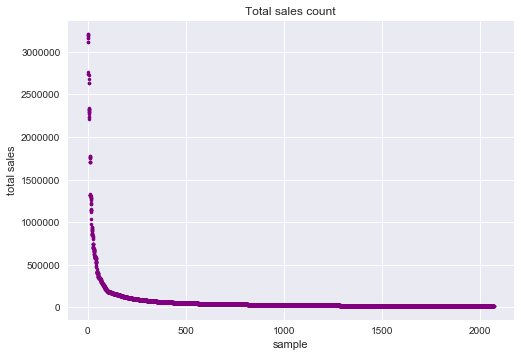

7397

In [25]:
volume_perc=0.6 * sales_volume[len(sales_volume)-1]
print(volume_perc)
print(sales_volume[len(sales_volume)-1])
sales_sort['sales_volume']=sales_volume

sales_sort=sales_sort.sort_values('sales_volume',ascending = True)
sample=sales_sort[sales_sort['sales_volume']<=volume_perc]

sample=sample.sort_values('sales_9_month',ascending = False)
plt.plot(np.array(range(len(sample))) * 0.28, sample.sales_9_month,".",color="purple")
plt.title('Total sales count')
plt.xlabel('sample')
plt.ylabel('total sales')
plt.show()
len(sample)

So with capturing 60% total sales volume ,data is reduced to 7397 rows.

In [26]:
sample.lead_time.isnull().sum()

184

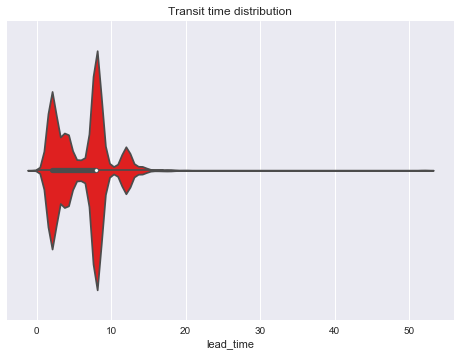

In [27]:
sns.violinplot(sample.lead_time,color='r')
plt.title('Transit time distribution')
plt.show()

###### Dropping the missing values in lead time

In [28]:
Ordernomiss=orders.dropna()
Ordernomiss.isnull().sum().sum()

0

backorder ratio is higher when we drop the Nan values in lead time thats because most of the backorderes values were non backorders


In [29]:
prob=len(Ordernomiss[Ordernomiss.went_on_backorder==1])/len(Ordernomiss.sku)
print((prob*100),'%')
print(len(Ordernomiss[Ordernomiss.went_on_backorder==1]))

0.691192696508497 %
10969


In [30]:
sales_nomiss=Ordernomiss.sort_values('sales_9_month',ascending = False)

C:\Users\Hedi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


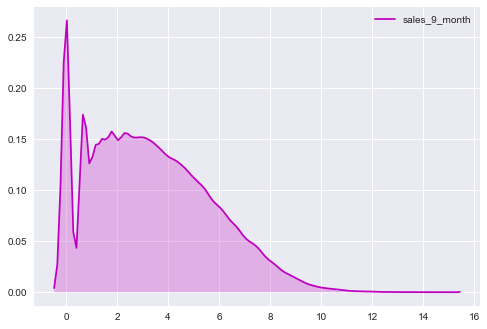

In [31]:
sns.kdeplot(np.log(sales_nomiss['sales_9_month']),color='m', shade=True)
plt.show()

[[ 1.          0.90796433]
 [ 0.90796433  1.        ]]


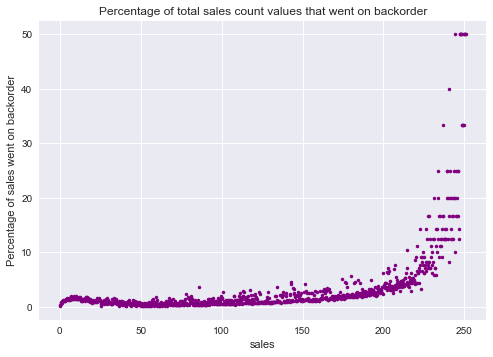

In [32]:
#relationship between sales and backorder
backorder_sales=sales_nomiss[sales_nomiss.went_on_backorder==1]
no_backorder_sales=sales_nomiss[sales_nomiss.went_on_backorder==0]
sales_b=backorder_sales.sales_9_month.value_counts()
sales_n=no_backorder_sales.sales_9_month.value_counts()
g=[]
df2 = pd.DataFrame(
    {
     'sales_b': sales_b,
     'sales_n':sales_n
    })

df2=df2[['sales_b','sales_n']].dropna()


for i in range(0,len(df2)):
    backorder_ratio=(df2.sales_b.iloc[i])/(df2.sales_n.iloc[i]+df2.sales_b.iloc[i])
    backorder_ratio=backorder_ratio*100
    g.append(backorder_ratio)


print(np.corrcoef(df2.index.values,g))
plt.plot(np.array(range(len(g))) * 0.25, g,".",color='purple')
plt.title('Percentage of total sales count values that went on backorder')
plt.xlabel('sales')
plt.ylabel('Percentage of sales went on backorder')
plt.show()


863511872.0
518107123.2


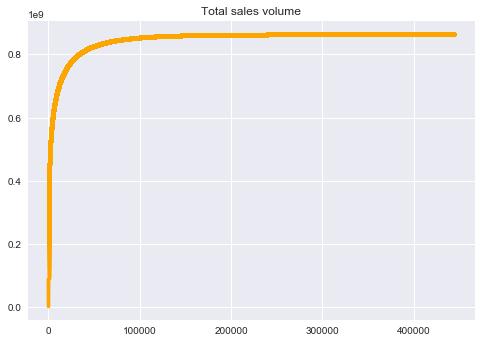

In [33]:
sales_volume_nomiss =np.cumsum(sales_nomiss.sales_9_month)
print(sales_volume_nomiss[len(sales_volume_nomiss)-1])
print(0.6 * sales_volume_nomiss[len(sales_volume_nomiss)-1])
plt.plot(np.array(range(len(sales_nomiss))) * 0.28, sales_volume_nomiss,".",color="orange")
plt.title('Total sales volume')
plt.show()


518107123.2
863511872.0


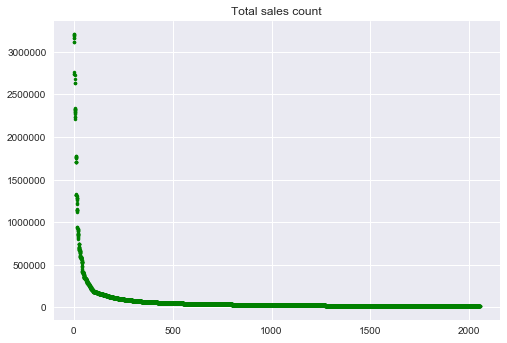

7330
1579637


In [34]:
volume_perc=0.6 * sales_volume_nomiss[len(sales_volume_nomiss)-1]
print(volume_perc)
print(sales_volume_nomiss[len(sales_volume_nomiss)-1])
sales_nomiss['sales_volume_nomiss']=sales_volume_nomiss

sales_nomiss=sales_nomiss.sort_values('sales_volume_nomiss',ascending = True)
sample_nomiss=sales_nomiss[sales_nomiss['sales_volume_nomiss']<=volume_perc]
notselected_rows=sales_nomiss[sales_nomiss['sales_volume_nomiss']>volume_perc]
sample_nomiss=sample_nomiss.sort_values('sales_9_month',ascending = False)
plt.plot(np.array(range(len(sample_nomiss))) * 0.28, sample_nomiss.sales_9_month,".",color="green")
plt.title('Total sales count')
plt.show()
print(len(sample_nomiss))
print(len(notselected_rows))
sample_nomiss=sample_nomiss.drop('sales_volume_nomiss',axis=1)

there is not major differences when I dropped missing values of lead time so i think missing values in lead time doesnt effect our result.
next I want to replace it with median

In [35]:
orderimp=orders
orderimp['lead_time'] = Imputer(strategy='median').fit_transform(
                                    orderimp['lead_time'].values.reshape(-1, 1))    #replace missing lead time to median value

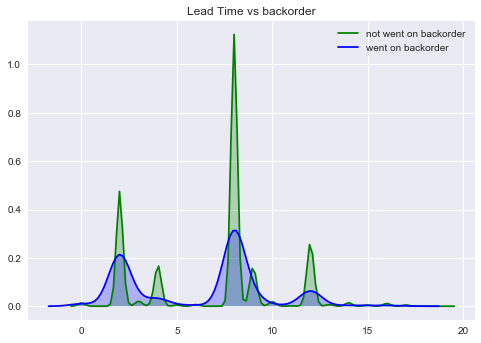

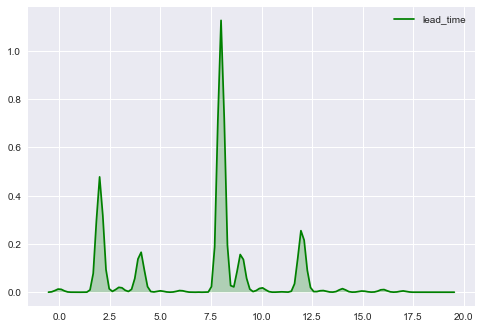

In [36]:
#Relationship between lead time and went on backorder
sns.kdeplot(orderimp[(orderimp['went_on_backorder'] == 0) & (orderimp['lead_time'] < 20)]['lead_time'],color='g', shade=True,label='not went on backorder')
sns.kdeplot(orderimp[(orderimp['went_on_backorder'] == 1) & (orderimp['lead_time'] < 20)]['lead_time'], color='b',shade=True,label='went on backorder')
plt.title('Lead Time vs backorder')
plt.show()
sns.kdeplot(orderimp[(orderimp['lead_time'] < 20)]['lead_time'],color='g',shade="True")
plt.show()

[[ 1.         -0.53975552]
 [-0.53975552  1.        ]]


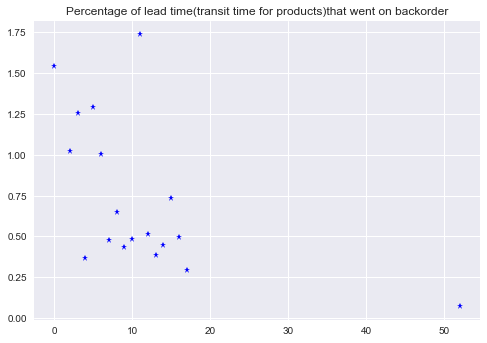

[1.5412425078489203, 1.0245938079797985, 1.2551528948501816, 0.36954339995487684, 1.2900024807740016, 1.006523765144455, 0.4784688995215311, 0.64718885323192166, 0.43348510703685433, 0.48618940248027059, 1.7367458866544789, 0.51276915373059584, 0.38852913968547642, 0.44599573395384917, 0.73452256033578167, 0.49756869840551843, 0.29231995748073347, 0.073058147643874735]


,lead_b,lead_n
0.0,162.0,10349
2.0,3457.0,333945
3.0,204.0,16049
4.0,475.0,128062
5.0,52.0,3979
6.0,54.0,5311
7.0,1.0,208
8.0,5068.0,778011
9.0,536.0,123113
10.0,69.0,14123


In [37]:
b=orderimp[['went_on_backorder','lead_time']]
backorder=b[b.went_on_backorder==1]
no_backorder=b[b.went_on_backorder==0]
lead_b=backorder.lead_time.value_counts()
lead_n=no_backorder.lead_time.value_counts()
c=[]
df1 = pd.DataFrame(
    {
     'lead_b': lead_b,
     'lead_n':lead_n
    })

df1=df1[['lead_b','lead_n']].dropna()


for i in range(0,len(df1)):
    backorder_ratio=(df1.lead_b.iloc[i])/(df1.lead_n.iloc[i]+df1.lead_b.iloc[i])
    backorder_ratio=backorder_ratio*100
    c.append(backorder_ratio)


print(np.corrcoef(df1.index.values,c))

plt.plot(df1.index.values,c,"*",color="blue")
plt.title('Percentage of lead time(transit time for products)that went on backorder')
#plt.plot(np.array(range(len(c))) * 0.25, c,".")
plt.show()
print(c)
df1


883338607.0
530003164.2


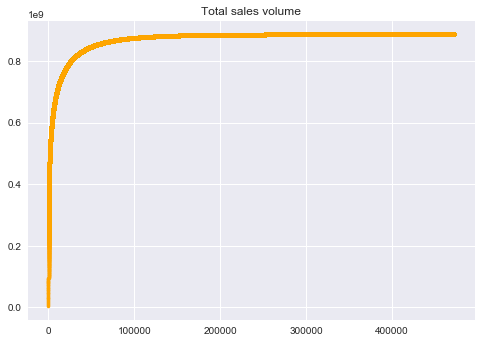

In [38]:
sales_imp=orderimp.sort_values('sales_9_month',ascending = False)
sales_volume_imp =np.cumsum(sales_imp.sales_9_month)
#print(sales_volume_imp)
print(sales_volume_imp[len(sales_volume_imp)-1])
print(0.6 * sales_volume_imp[len(sales_volume_imp)-1])
plt.plot(np.array(range(len(sales_imp))) * 0.28, sales_volume_imp,".",color="orange")
plt.title('Total sales volume')
plt.show()

353335442.8
883338607.0


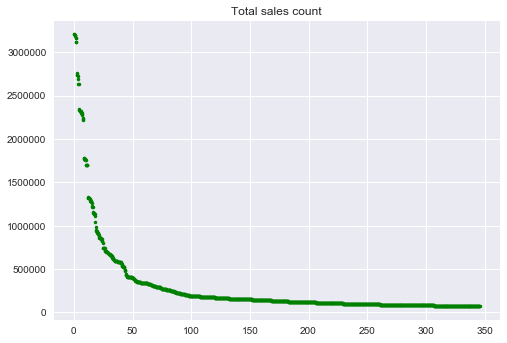

1236

In [39]:

volume_perc=0.4 * sales_volume_imp[len(sales_volume_imp)-1]
print(volume_perc)
print(sales_volume_imp[len(sales_volume_imp)-1])
sales_imp['sales_volume_imp']=sales_volume_imp

sales_imp=sales_imp.sort_values('sales_volume_imp',ascending = True)
sample_imp=sales_imp[sales_imp['sales_volume_imp']<=volume_perc]
sample_imp=sample_imp.sort_values('sales_9_month',ascending = False)
plt.plot(np.array(range(len(sample_imp))) * 0.28, sample_imp.sales_9_month,".",color="green")
plt.title('Total sales count')
plt.show()
len(sample_imp)

So based on above pbservations dropping missing values in Lead time is a good choice

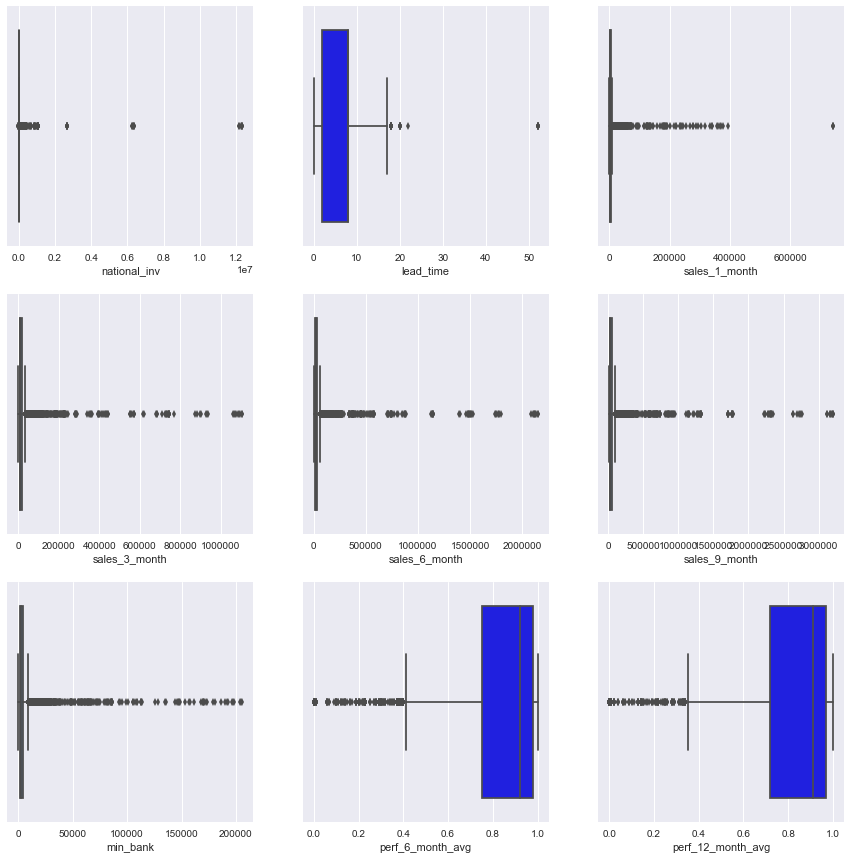

In [40]:
#outliers
fig , ax1 = plt.subplots(nrows=3, ncols=3,figsize=(15,15))
sns.boxplot(sample_nomiss.national_inv, ax=ax1[0,0],color='b' )
sns.boxplot(sample_nomiss.lead_time, ax=ax1[0,1],color='b' )
sns.boxplot(sample_nomiss.sales_1_month,ax=ax1[0,2],color='b' )
sns.boxplot(sample_nomiss.sales_3_month, ax=ax1[1,0])
sns.boxplot(sample_nomiss.sales_6_month, ax=ax1[1,1])
sns.boxplot(sample_nomiss.sales_9_month, ax=ax1[1,2])
sns.boxplot(sample_nomiss.min_bank, ax=ax1[2,0])
sns.boxplot(sample_nomiss.perf_6_month_avg, ax=ax1[2,1],color='b' )
sns.boxplot(sample_nomiss.perf_12_month_avg, ax=ax1[2,2],color='b' )
plt.show()

#sns.violinplot(df.transit_duration,  ax=ax1[1])
#sns.plt.title('transit_quantity range and distribution')

In [41]:
def get_outlier_boundaries(column):
    q75, q25  = np.percentile(column, [75,25])
    iqr = q75 - q25

    lower = q25 - 1.5 * iqr
    upper = q75 + 1.5 * iqr

    return lower,upper

In [42]:

transit_duration_upper = get_outlier_boundaries(sample_nomiss.lead_time)[1]
outlier_transit_duration = sample_nomiss[sample_nomiss.lead_time > transit_duration_upper]
print(outlier_transit_duration.shape)
outlier_transit_duration.went_on_backorder.value_counts()

(29, 23)


0    29
Name: went_on_backorder, dtype: int64

In [43]:
sales_duration_upper = get_outlier_boundaries(sample_nomiss.sales_1_month)[1]
outlier_sales_duration = sample_nomiss[sample_nomiss.sales_1_month > sales_duration_upper]
print(outlier_sales_duration.shape)
outlier_sales_duration.went_on_backorder.value_counts()

(877, 23)


0    876
1      1
Name: went_on_backorder, dtype: int64

###### How common are backorders?

How common are backorders? Given that, how likely are backorders based on the part risk flags? 
And how prevalent are they? 
What is the relationship between "potential_issue" and "pieces_past_due" are each represented by part 
risk flags or are they unrelated concepts? What's the relationship between lead time and back orders? 
Based on the answers to these questions you could recommend: What aspects of the supply chain present the biggest risks? 
Based on the risks, what would you recommend improving first?
    
potential_issue - Source issue for part identified

pieces_past_due - Parts overdue from source

local_bo_qty - Amount of stock orders overdue

deck_risk - Part risk flag

oe_constraint - Part risk flag

ppap_risk - Part risk flag

In [44]:
print(np.corrcoef(orders.potential_issue,orders.pieces_past_due))
print('Source issue for part identified correlation with backorder',np.corrcoef(orders.potential_issue,orders.went_on_backorder))
print('Parts overdue from source correlation with backorder', np.corrcoef(orders.went_on_backorder,orders.pieces_past_due))
print('Amount of stock orders overdue correlation with backorder',np.corrcoef(orders.went_on_backorder,orders.local_bo_qty))
print('oe_constraint - Part risk flag correlation with backorder',np.corrcoef(orders.went_on_backorder,orders.oe_constraint))
print('ppap_risk - Part risk flag correlation with backorder', np.corrcoef(orders.went_on_backorder,orders.ppap_risk))
print('Total sales for perior 9,6,3 and 1 month correlation with backorder',np.corrcoef(orders.went_on_backorder,orders.sales_9_month))
print('Total Forecast sales - Part risk flag correlation with backorder',np.corrcoef(orders.went_on_backorder,orders.forecast_9_month))


[[ 1.          0.00331913]
 [ 0.00331913  1.        ]]
Source issue for part identified correlation with backorder [[ 1.         0.0140902]
 [ 0.0140902  1.       ]]
Parts overdue from source correlation with backorder [[  1.00000000e+00   5.16086480e-04]
 [  5.16086480e-04   1.00000000e+00]]
Amount of stock orders overdue correlation with backorder [[ 1.          0.00950369]
 [ 0.00950369  1.        ]]
oe_constraint - Part risk flag correlation with backorder [[ 1.          0.00383717]
 [ 0.00383717  1.        ]]
ppap_risk - Part risk flag correlation with backorder [[ 1.         0.0088142]
 [ 0.0088142  1.       ]]
Total sales for perior 9,6,3 and 1 month correlation with backorder [[ 1.         -0.00176378]
 [-0.00176378  1.        ]]
Total Forecast sales - Part risk flag correlation with backorder [[ 1.         -0.00102983]
 [-0.00102983  1.        ]]


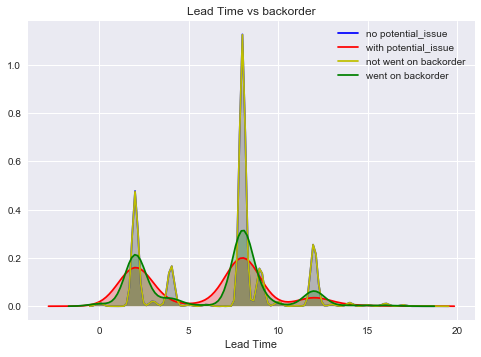

In [45]:
sns.kdeplot(orders[(orders['potential_issue'] == 0) & (orders['lead_time'] < 20)]['lead_time'],color='b', shade=True,label='no potential_issue')
sns.kdeplot(orders[(orders['potential_issue'] == 1) & (orders['lead_time'] < 20)]['lead_time'], color='r',shade=True,label='with potential_issue')
plt.title('Lead Time vs backorder and potential issue from the source')
plt.xlabel('Lead Time')

sns.kdeplot(orders[(orders['went_on_backorder'] == 0) & (orders['lead_time'] < 20)]['lead_time'],color='y', shade=True,label='not went on backorder')
sns.kdeplot(orders[(orders['went_on_backorder'] == 1) & (orders['lead_time'] < 20)]['lead_time'], color='g',shade=True,label='went on backorder')
plt.title('Lead Time vs backorder')
plt.xlabel('Lead Time')
plt.show()

above plot shows that went on backorder and potential issues have the same relation with lead time. mean when a products with certain lead time did not have the potential isse the products did not go on backorder.
so potentail issue is one of the main reason that a product went on backorder.

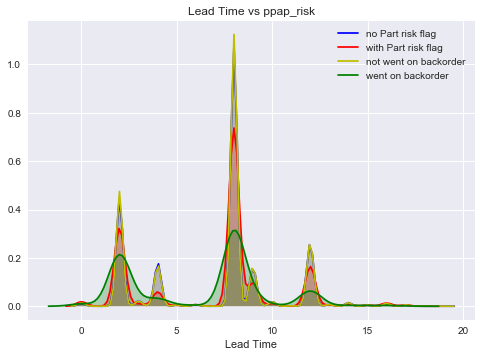

In [46]:
sns.kdeplot(orders[(orders['ppap_risk'] == 0) & (orders['lead_time']<20)]['lead_time'],color='b', shade=True,label='no Part risk flag')
sns.kdeplot(orders[(orders['ppap_risk'] == 1) & (orders['lead_time']<20)]['lead_time'], color='r',shade=True,label='with Part risk flag')
plt.title('lead time vs ppap_risk')
plt.xlabel('Lead Time')

sns.kdeplot(orders[(orders['went_on_backorder'] == 0) & (orders['lead_time'] < 20)]['lead_time'],color='y', shade=True,label='not went on backorder')
sns.kdeplot(orders[(orders['went_on_backorder'] == 1) & (orders['lead_time'] < 20)]['lead_time'], color='g',shade=True,label='went on backorder')
plt.title('Lead Time vs ppap_risk')
plt.xlabel('Lead Time')
plt.show()

if the products didnt have part risk flag then it did not go back order.

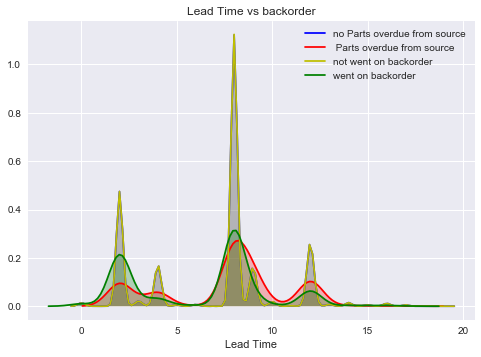

In [47]:


sns.kdeplot(orders[(orders['pieces_past_due'] == 0) & (orders['lead_time']<20)]['lead_time'],color='b', shade=True,label='no Parts overdue from source')
sns.kdeplot(orders[(orders['pieces_past_due'] == 1) & (orders['lead_time']<20)]['lead_time'], color='r',shade=True,label=' Parts overdue from source')
plt.title('lead_time vs  Parts overdue from source')
plt.xlabel('Lead Time')
sns.kdeplot(orders[(orders['went_on_backorder'] == 0) & (orders['lead_time'] < 20)]['lead_time'],color='y', shade=True,label='not went on backorder')
sns.kdeplot(orders[(orders['went_on_backorder'] == 1) & (orders['lead_time'] < 20)]['lead_time'], color='g',shade=True,label='went on backorder')
plt.title('Lead Time vs backorder')
plt.xlabel('Lead Time')
plt.show()

same thing with parts overdue, id there is no parts overdue from the source the products doesnt go backorder

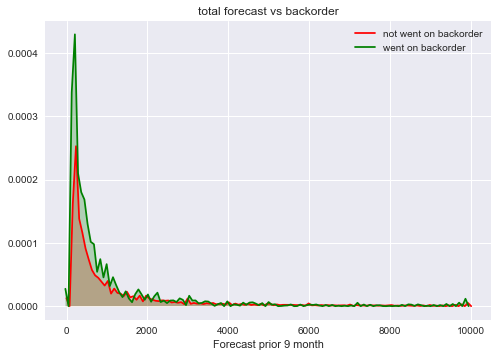

In [48]:
sns.kdeplot(orders[(orders['went_on_backorder'] == 0) & (orders['forecast_9_month']<10000)]['forecast_9_month'],color='r', shade=True,label='not went on backorder')
sns.kdeplot(orders[(orders['went_on_backorder'] == 1) & (orders['forecast_9_month']<10000)]['forecast_9_month'], color='g',shade=True,label='went on backorder')
plt.title('total forecast vs backorder')
plt.xlabel('Forecast prior 9 month')
plt.show()

Relationship between Sales and Forcast

## How predictable are sales?


I want to figure out what is the relationship of sales and forecast when the product went on backorder.

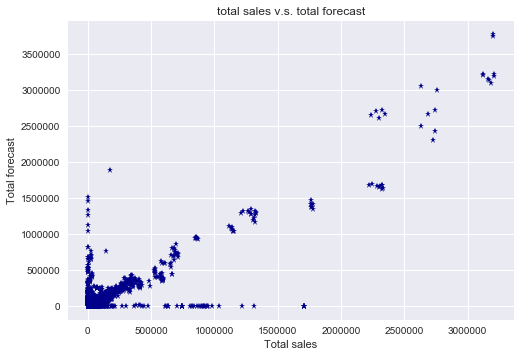

Total Forecast sale-Total Sales [[ 1.         0.8818941]
 [ 0.8818941  1.       ]]


In [49]:
plt.plot((orders.sales_9_month), orders.forecast_9_month,"*",color='darkblue')
plt.title('total sales v.s. total forecast')
plt.xlabel('Total sales')
plt.ylabel('Total forecast')
plt.show()
print('Total Forecast sale-Total Sales',np.corrcoef(orders.sales_9_month,orders.forecast_9_month))

In [50]:
b=orders[orders['went_on_backorder']==1]
print(len(b))
b=b[['sales_9_month','forecast_9_month']]
b=b[b['sales_9_month']>b['forecast_9_month']]
print(len(b))
b.head()

11293
4274


,sales_9_month,forecast_9_month
180,148.0,126.0
1491,58.0,25.0
1631,50.0,23.0
1641,12.0,6.0
1642,2.0,1.0


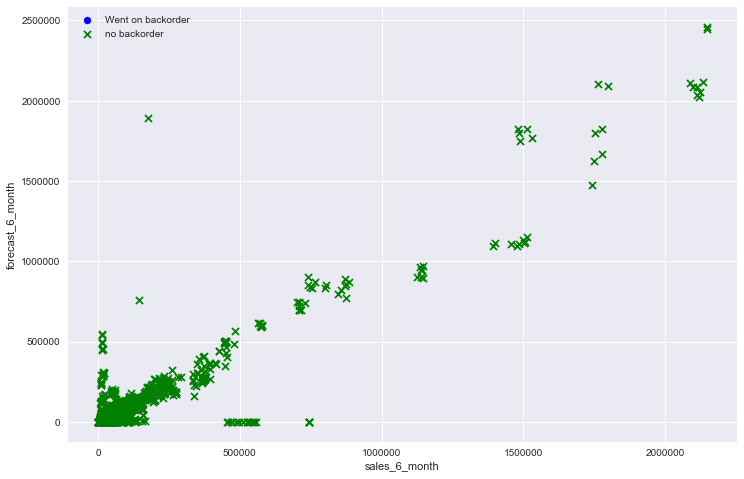

In [51]:
positive = sample_nomiss[sample_nomiss['went_on_backorder'].isin([1])]  
negative = sample_nomiss[sample_nomiss['went_on_backorder'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(positive['sales_6_month'], positive['forecast_6_month'], s=50, c='b', marker='o', label='Went on backorder')  
ax.scatter(negative['sales_6_month'], negative['forecast_6_month'], s=50, c='g', marker='x', label='no backorder')  
ax.legend()  
ax.set_xlabel('sales_6_month')  
ax.set_ylabel('forecast_6_month') 
plt.show()

In [52]:
fc=Ordernomiss[Ordernomiss['went_on_backorder']==1]

C:\Users\Hedi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\Hedi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


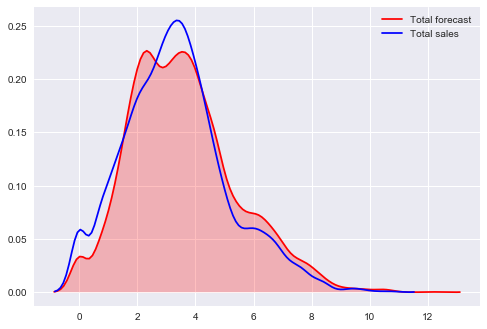

In [53]:
#compare sales and forecast
sns.kdeplot(np.log(fc['forecast_9_month']),color='r', shade=True,label='Total forecast')
sns.kdeplot(np.log(fc['sales_9_month']),color='b', shade=False,label='Total sales')
plt.show()

In [54]:
o=orders[(orders.went_on_backorder==1)]
o=o[(o.went_on_backorder==1)]
#o.groupby(['sales_9_month', 'forecast_9_month']).size()

the probability of products with "parts overdue from source" that went on backorder is almost 0.008%.
It' only 2% chance that the product didn't have parts overdue,it went on backorder.

In [55]:
p=orders[(orders.went_on_backorder==0) & (orders.deck_risk==0)]
prob=((len(p.sku)/len(orders.sku))*100)
print('Probability of product that didnt have part risk falg and did not go on backorder',prob,'%')

Probability of product that didnt have part risk falg and did not go on backorder 76.48738639460618 %


In [56]:
p=orders[(orders.went_on_backorder==0) & (orders.pieces_past_due==0)]
prob=((len(p.sku)/len(orders.sku))*100)
print('Probability of product that didnt have parts overdue and didnt go on backorder',prob,'%')
pn=orders[(orders.went_on_backorder==1) & (orders.pieces_past_due==0)]
prob_pn=(len(pn.sku)/len(orders.sku))*100
print('Probability of product that did not have parts overdue and did go on backorder',prob_pn,'%')


Probability of product that didnt have parts overdue and didnt go on backorder 97.894612112379 %
Probability of product that did not have parts overdue and did go on backorder 0.6071001149384427 %


In [57]:
p=orders[(orders.went_on_backorder==1) & (orders.pieces_past_due==1)]
prob=((len(p.sku)/len(orders.sku))*100)
print('Probability of product that had parts overdue and went on backorder',prob,'%')

Probability of product that had parts overdue and went on backorder 0.008709253137108528 %


Probbility of source issue for Source issue for part identified and went on backorder is 0.003% which is almost 0.


In [58]:

p=orders[(orders.went_on_backorder==0) & (orders.potential_issue==0)]
prob=(len(p.sku)/len(orders.sku))*100
print('Probability of product that didnt have Source issue for part identified and didnt go on backorder',prob,'%')
print (p.size)
pn=orders[(orders.went_on_backorder==1) & (orders.potential_issue==0)]

prob_pn=(len(pn.sku)/len(orders.sku))*100
print('Probability of product that had  Source issue for part identified and went on backorder',prob_pn,'%')

Probability of product that didnt have Source issue for part identified and didnt go on backorder 99.28021281385897 %
38541353
Probability of product that had  Source issue for part identified and went on backorder 0.6660505018188713 %


In [59]:
p=orders[(orders.went_on_backorder==1) & (orders.potential_issue==1)]
prob=(len(p.sku)/len(orders.sku))*100
print('Probability of product that had  Source issue for part identified and went on backorder',prob,'%')

Probability of product that had  Source issue for part identified and went on backorder 0.003021577618996836 %


In [60]:
p=orders[(orders.went_on_backorder==0) & (orders.local_bo_qty==0)]
prob=(len(p.sku)/len(orders.sku))*100
print('Probability of product that didnt have amount of stock orders overdue and didnt go on backorder',prob,'%')
print (p.size)
pn=orders[(orders.went_on_backorder==1) & (orders.local_bo_qty==0)]

prob_pn=(len(pn.sku)/len(orders.sku))*100
print('Probability of product that had  amount of stock orders overdue and went on backorder',prob_pn,'%')


Probability of product that didnt have amount of stock orders overdue and didnt go on backorder 98.03087933833375 %
38056352
Probability of product that had  amount of stock orders overdue and went on backorder 0.5861860580853863 %


In [61]:
p=orders[(orders.went_on_backorder==1) & (orders.local_bo_qty==1)]
prob=(len(p.sku)/len(orders.sku))*100
print('Probability of product that had amount of stock orders overdue and went on backorder',prob,'%')

Probability of product that had amount of stock orders overdue and went on backorder 0.021802756152761487 %


In [62]:
p=orders[(orders.went_on_backorder==1) & (orders.oe_constraint==1)]
prob=(len(p.sku)/len(orders.sku))*100
print('Probability of product that had constraint flag and went on backorder',prob,'%')

#

Probability of product that had constraint flag and went on backorder 0.00047397295984264094 %


In [63]:
p=orders[(orders.went_on_backorder==1) & (orders.ppap_risk==1)]
prob=(len(p.sku)/len(orders.sku))*100
print('Probability of product that had Source issue for part identified and went on backorder',prob,'%')

Probability of product that had Source issue for part identified and went on backorder 0.10421480454540068 %


In [64]:
p=orders[(orders.went_on_backorder==0) & (orders.pieces_past_due==0)& (orders.local_bo_qty==0)&(orders.potential_issue==0)]
prob=((len(p.sku)/len(orders.sku))*100)
print('Probability of product that did not have parts overdue,potential issue,local stock overdue and did not go on backorder',prob,'%')

pn=orders[(orders.went_on_backorder==1) & (orders.pieces_past_due==0)& (orders.local_bo_qty==0)&(orders.potential_issue==0)]
prob_pn=((len(pn.sku)/len(orders.sku))*100)
print('Probability of product that had parts overdue and went on backorder',prob_pn,'%')

Probability of product that did not have parts overdue,potential issue,local stock overdue and did not go on backorder 96.68941736873911 %
Probability of product that had parts overdue and went on backorder 0.5443579443792731 %


In [65]:
pn=orders[(orders.went_on_backorder==1) & (orders.pieces_past_due==1)& (orders.local_bo_qty==1)&(orders.potential_issue==1)]
prob_pn=((len(pn.sku)/len(orders.sku))*100)
print('Probability of product that had parts overdue,potential issue,local stock overdue and went on backorder',prob,'%')


Probability of product that had parts overdue,potential issue,local stock overdue and went on backorder 96.68941736873911 %


In [66]:

p=orders[(orders.went_on_backorder==1) & (orders.ppap_risk==1)]
prob=((len(p.sku)/len(orders.sku))*100)
print('Probability of product that had parts overdue and went on backorder',prob,'%')


Probability of product that had parts overdue and went on backorder 0.10421480454540068 %


Look's like deck_risk,stop_auto_buy and ppap_risk has some realtion with went_on_backorder. Let's find out using crosstabulation and chi-square.

For a chi-square test for association, the hypotheses are as follows:

Ho==> Features are indepnedent, no association between variables exists.

H1==> Features are not independent; an association between variables exist.

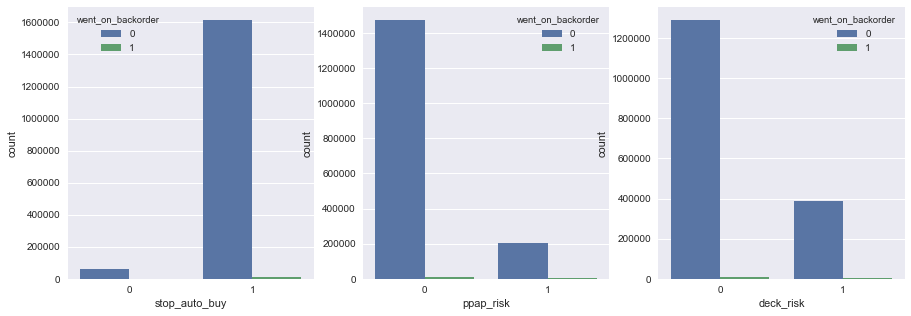

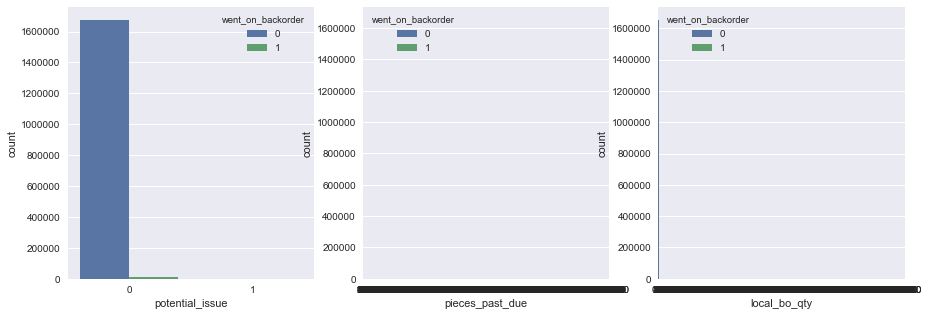

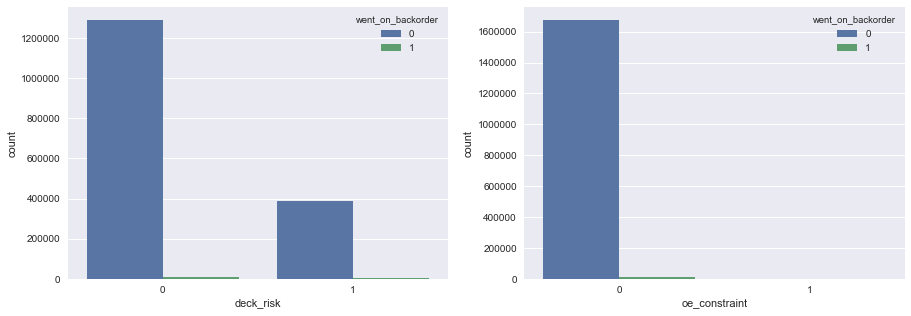

In [67]:
fig , ax = plt.subplots(ncols=3, figsize=(15,5))
sns.countplot('stop_auto_buy',hue='went_on_backorder', data=orders, ax=ax[0])
sns.countplot('ppap_risk', hue='went_on_backorder', data=orders, ax=ax[1])
sns.countplot('deck_risk', hue='went_on_backorder', data=orders, ax=ax[2])
plt.show()

fig , ax = plt.subplots(ncols=3, figsize=(15,5))
sns.countplot('potential_issue',hue='went_on_backorder', data=orders, ax=ax[0])
sns.countplot('pieces_past_due', hue='went_on_backorder', data=orders, ax=ax[1])
sns.countplot('local_bo_qty', hue='went_on_backorder', data=orders, ax=ax[2])
plt.show()

fig , ax = plt.subplots(ncols=2, figsize=(15,5))
sns.countplot('deck_risk',hue='went_on_backorder', data=orders, ax=ax[0])
sns.countplot('oe_constraint', hue='went_on_backorder', data=orders, ax=ax[1])
plt.show()

I used crosstabulation and chi-square to find the relation between target variable with other categorical variables. All the relations has p-values is less than 0.05 and we also have chi-square calculated value is greater than the chi-square critical value. Based on these two evidence we can reject the null hypothesis and can go with the alternate hypothesis.

Here we can say that went_on_backorder is related to deck_risk,ppap_risk and stop_auto_buy, so we will keep all these features for modeling

P-values less than 0.5 means that we can reject Ho and accept H1: H1==> Features are not independent; The relationship exists between the selected categories.

potential_issue - Source issue for part identified

pieces_past_due - Parts overdue from source

local_bo_qty - Amount of stock orders overdue

deck_risk - Part risk flag

oe_constraint - Part risk flag

ppap_risk - Part risk flag    

stop_auto_buy  

rev_stop  

In [68]:
# ppap_risk relation with went_on_backorder
contingency_table_ppasrisk = pd.crosstab(orders.ppap_risk, orders.went_on_backorder)
contingency_table_ppasrisk.columns = ['No','Yes']
contingency_table_ppasrisk.index = ['No','Yes']
contingency_table_ppasrisk

,No,Yes
No,1474492,9534
Yes,202075,1759


In [69]:
chi_ppasrisk , p_val_ppasrisk , dof_ppasrisk , exp_ppasrisk  = stats.chi2_contingency(contingency_table_ppasrisk )
chi2_critical_ppasrisk = stats.chi2.ppf(q = 0.95, df = dof_ppasrisk)
print("Chi-square Critical value:", chi2_critical_ppasrisk)
print('chi2 :', chi_ppasrisk)
print('p_val:', p_val_ppasrisk)
print('degree of freedom:', dof_ppasrisk)

Chi-square Critical value: 3.84145882069
chi2 : 130.798600861
p_val: 2.74046384479e-30
degree of freedom: 1


In [100]:
contingency_table_potential_issue   = pd.crosstab(orders.potential_issue  , orders.went_on_backorder)
contingency_table_potential_issue  .columns = ['No','Yes']
contingency_tablchi_ppasrisk , p_val_ppasrisk , dof_ppasrisk , exp_ppasrisk  = stats.chi2_contingency(contingency_table_ppasrisk )
chi2_critical_ppasrisk = stats.chi2.ppf(q = 0.95, df = dof_ppasrisk)
print("Chi-square Critical value:", chi2_critical_ppasrisk)
print('chi2 :', chi_ppasrisk)
print('p_val:', p_val_ppasrisk)
print('degree of freedom:', dof_ppasrisk)


Chi-square Critical value: 3.84145882069
chi2 : 130.798600861
p_val: 2.74046384479e-30
degree of freedom: 1


In [101]:
chi_potential_issue , p_val_potential_issue , dof_potential_issue , exp_potential_issue= stats.chi2_contingency(contingency_table_potential_issue )
chi2_critical_potential_issue = stats.chi2.ppf(q = 0.95, df = dof_potential_issue)
print("Chi-square Critical value:", chi2_critical_potential_issue)
print('chi2 :', chi_potential_issue)
print('p_val:', p_val_potential_issue)
print('degree of freedom:', dof_potential_issue)

Chi-square Critical value: 3.84145882069
chi2 : 327.68081823
p_val: 3.07548465734e-73
degree of freedom: 1


In [102]:
contingency_table_stop_auto_buy = pd.crosstab(orders.stop_auto_buy, orders.went_on_backorder)
contingency_table_stop_auto_buy.columns = ['No','Yes']
contingency_table_stop_auto_buy.index = ['No','Yes']
contingency_table_stop_auto_buy

,No,Yes
No,60615,471
Yes,1615952,10822


In [103]:
chi_stop_auto_buy , p_val_stop_auto_buy, dof_stop_auto_buy , exp_stop_auto_buy  = stats.chi2_contingency(contingency_table_stop_auto_buy )
chi2_critical_stop_auto_buy = stats.chi2.ppf(q = 0.95, df = dof_stop_auto_buy)
print("Chi-square Critical value:", chi2_critical_stop_auto_buy)
print('chi2 :', chi_stop_auto_buy)
print('p_val:', p_val_stop_auto_buy)
print('degree of freedom:', dof_stop_auto_buy)

Chi-square Critical value: 3.84145882069
chi2 : 9.75787726327
p_val: 0.00178555963213
degree of freedom: 1


In [104]:
contingency_table_rev_stop = pd.crosstab(orders.rev_stop, orders.went_on_backorder)
contingency_table_rev_stop.columns = ['No','Yes']
contingency_table_rev_stop.index = ['No','Yes']
contingency_table_rev_stop

,No,Yes
No,1675836,11293
Yes,731,0


In [105]:
chi_rev_stop , p_val_rev_stop, dof_rev_stop , exp_rev_stop  = stats.chi2_contingency(contingency_table_rev_stop )
chi2_critical_rev_stop = stats.chi2.ppf(q = 0.95, df = dof_rev_stop)
print("Chi-square Critical value:", chi2_critical_rev_stop)
print('chi2 :', chi_rev_stop)
print('p_val:', p_val_rev_stop)
print('degree of freedom:', dof_rev_stop)

Chi-square Critical value: 3.84145882069
chi2 : 3.9703042634
p_val: 0.0463094038953
degree of freedom: 1


In [119]:
# ppap_risk relation with went_on_backorder
contingency_table_pieces_past_due  = pd.crosstab(orders.pieces_past_due,orders.went_on_backorder)
contingency_table_pieces_past_due .columns = ['No','Yes']
contingency_table_pieces_past_due.index = ['No','Yes']
contingency_table_pieces_past_due

ValueError: Length mismatch: Expected axis has 826 elements, new values have 2 elements

In [107]:
chi_pieces_past_due , p_val_pieces_past_due, dof_pieces_past_due , exp_pieces_past_due  = stats.chi2_contingency(contingency_table_pieces_past_due )
chi2_critical_pieces_past_due = stats.chi2.ppf(q = 0.95, df = dof_pieces_past_due)
print("Chi-square Critical value:", chi2_critical_pieces_past_due)
print('chi2 :', chi_pieces_past_due)
print('p_val:', p_val_pieces_past_due)
print('degree of freedom:', dof_pieces_past_due)

Chi-square Critical value: 892.931831302
chi2 : 8216.34330009
p_val: 0.0
degree of freedom: 825


In [108]:
contingency_table_local_bo_qty = pd.crosstab(orders.local_bo_qty, orders.went_on_backorder)
contingency_table_local_bo_qty.columns = ['No','Yes']
contingency_table_local_bo_qty.index = ['No','Yes']
contingency_table_local_bo_qty

ValueError: Length mismatch: Expected axis has 654 elements, new values have 2 elements

In [109]:
chi_local_bo_qty , p_val_local_bo_qty, dof_local_bo_qty , exp_local_bo_qty  = stats.chi2_contingency(contingency_table_local_bo_qty )
chi2_critical_local_bo_qty = stats.chi2.ppf(q = 0.95, df = dof_local_bo_qty)
print("Chi-square Critical value:", chi2_critical_local_bo_qty)
print('chi2 :', chi_local_bo_qty)
print('p_val:', p_val_local_bo_qty)
print('degree of freedom:', dof_local_bo_qty)

Chi-square Critical value: 713.557870509
chi2 : 16767.3212128
p_val: 0.0
degree of freedom: 653


In [110]:
contingency_table_deck_risk = pd.crosstab(orders.deck_risk, orders.went_on_backorder)
contingency_table_deck_risk.columns = ['No','Yes']
contingency_table_deck_risk.index = ['No','Yes']
contingency_table_deck_risk

,No,Yes
No,1291000,9377
Yes,385567,1916


In [111]:
chi_deck_risk , p_val_deck_risk, dof_deck_risk , exp_deck_risk  = stats.chi2_contingency(contingency_table_deck_risk )
chi2_critical_deck_risk = stats.chi2.ppf(q = 0.95, df = dof_deck_risk)
print("Chi-square Critical value:", chi2_critical_deck_risk)
print('chi2 :', chi_deck_risk)
print('p_val:', p_val_deck_risk)
print('degree of freedom:', dof_deck_risk)

Chi-square Critical value: 3.84145882069
chi2 : 230.357629836
p_val: 4.98138077036e-52
degree of freedom: 1


In [112]:
contingency_table_oe_constraint = pd.crosstab(orders.oe_constraint, orders.went_on_backorder)
contingency_table_oe_constraint.columns = ['No','Yes']
contingency_table_oe_constraint.index = ['No','Yes']
contingency_table_oe_constraint

,No,Yes
No,1676330,11285
Yes,237,8


In [113]:
chi_oe_constraint , p_val_oe_constraint, dof_oe_constraint , exp_oe_constraint = stats.chi2_contingency(contingency_table_oe_constraint )
chi2_critical_oe_constraint = stats.chi2.ppf(q = 0.95, df = dof_oe_constraint)
print("Chi-square Critical value:", chi2_critical_oe_constraint)
print('chi2 :', chi_oe_constraint)
print('p_val:', p_val_oe_constraint)
print('degree of freedom:', dof_oe_constraint)

Chi-square Critical value: 3.84145882069
chi2 : 21.098395131
p_val: 4.36293370618e-06
degree of freedom: 1


##### Minimum recommend amount to stock
With more minimum recommended amount to stock the order volumes decrease.

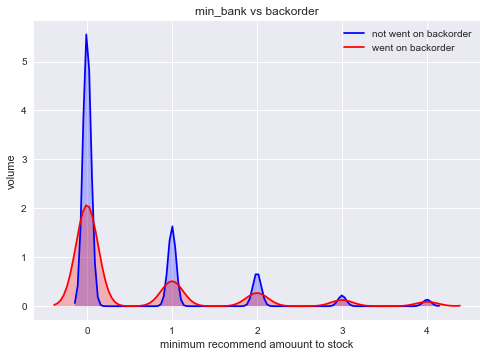

C:\Users\Hedi\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


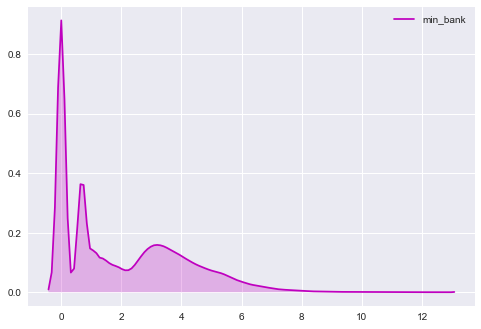

In [120]:
#binaries = ['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk',
               #'stop_auto_buy', 'rev_stop', 'went_on_backorder']
#check the  Minimum recommend amount to stock relationship with backorder
Ordernomiss['min_bank']
sns.kdeplot(Ordernomiss[(Ordernomiss['went_on_backorder'] == 0) & (Ordernomiss['min_bank'] < 5)]['min_bank'],color='b', shade=True,label='not went on backorder')
sns.kdeplot(Ordernomiss[(Ordernomiss['went_on_backorder'] == 1) & (Ordernomiss['min_bank'] < 5)]['min_bank'], color='r',shade=True,label='went on backorder')
plt.title('min_bank vs backorder')
plt.xlabel('minimum recommend amouunt to stock')
plt.ylabel('volume')
plt.show()

sales_sort=orders.sort_values('min_bank',ascending = False)
sns.kdeplot(np.log(sales_sort['min_bank']),color='m', shade=True)
plt.show()

In [121]:
min_order = orders['min_bank'].shape[0]
minOrder_backorders =sum(orders[pd.notnull(orders["min_bank"])]["went_on_backorder"])
minOrder_backorder_ratio = minOrder_backorders / (min_order)
print('Proportion of orders with minimum recommend amount to stock that went_on_backorder:',minOrder_backorder_ratio * 100)



Proportion of orders with minimum recommend amount to stock that went_on_backorder: 0.669072079438


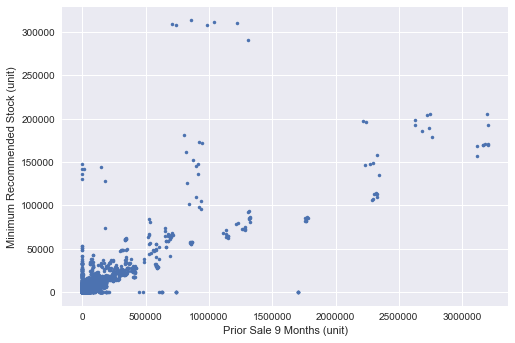

In [122]:
plt.plot(orders.sales_9_month, orders.min_bank, marker='.', linestyle='None')
plt.xlabel('Prior Sale 9 Months (unit)')
plt.ylabel('Minimum Recommended Stock (unit)')
plt.show()

Another observation around the recommended stock where we can see that prior sales were zero, however, the minimum recommended stock is kept at a high value. It could be a bad data or potential outliers.

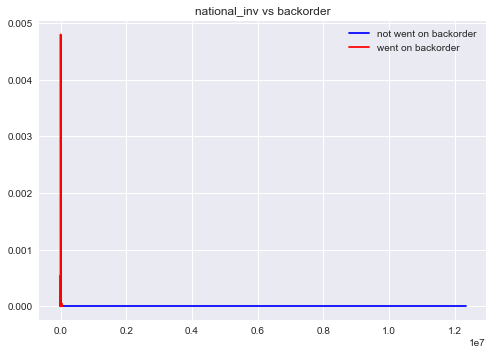

In [123]:
#national_inv         

orders['national_inv']
sns.kdeplot(orders[(orders['went_on_backorder'] == 0) & (orders['national_inv'])]['national_inv'],color='b', shade=True,label='not went on backorder')
sns.kdeplot(orders[(orders['went_on_backorder'] == 1) & (orders['national_inv'])]['national_inv'], color='r',shade=True,label='went on backorder')
plt.title('national_inv vs backorder')
plt.show()



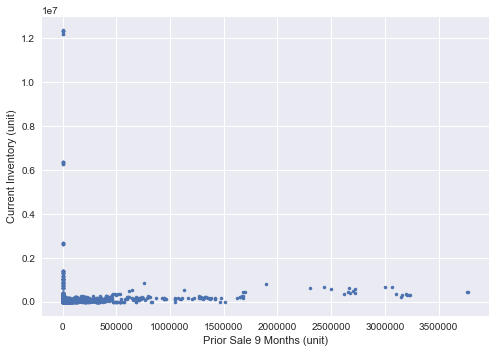

In [124]:
plt.plot(orders.forecast_9_month, orders.national_inv, marker='.', linestyle='None')
plt.xlabel('Prior Sale 9 Months (unit)')
plt.ylabel('Current Inventory (unit)')
plt.show()

C:\Users\Hedi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
C:\Users\Hedi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


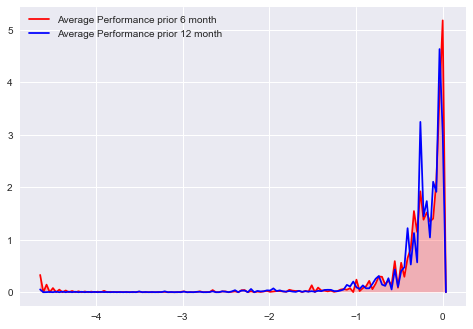

In [125]:
sns.kdeplot(np.log(Ordernomiss['perf_6_month_avg']),color='r', shade=True,label='Average Performance prior 6 month')
sns.kdeplot(np.log(Ordernomiss['perf_12_month_avg']),color='b', shade=False,label='Average Performance prior 12 month')
plt.show()

#### Normalization

The attributes related to quantities were normalized (std dev equal to 1) per row. Therefore, parts with different order of magnitudes are approximated. For example: 1 unit of a expensive machine may be different from 1 unit of a screw, but if we standard deviate all the quantities we have, we can get a better proportion of equivalence between those items.


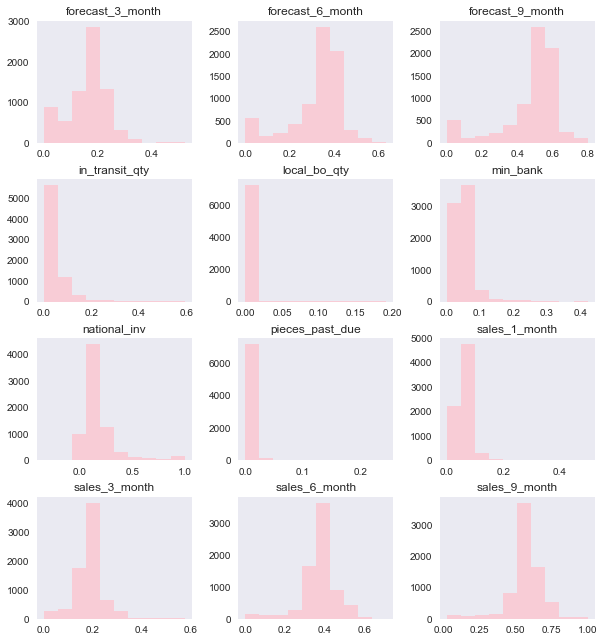

In [126]:
qty_related = ['national_inv', 'in_transit_qty', 'forecast_3_month', 
                   'forecast_6_month', 'forecast_9_month', 'min_bank',
                   'local_bo_qty', 'pieces_past_due', 'sales_1_month', 
                   'sales_3_month', 'sales_6_month', 'sales_9_month',]
sample_nomiss[qty_related] = normalize(sample_nomiss[qty_related], axis=1)
sample_nomiss[qty_related].hist(figsize=(10,11), alpha=0.7, color='pink', grid=False)
plt.show()


From above plot we can see the normal distribution 
Note that we used normalization (which forces standard deviation = 1), not scaling, which also forces mean equal to 0. This is because we want to keep some important informations about the part (for example, if inventory is lower than 0, we can correct that in preprocessing, or we will be misleading our models).

In [127]:
sample_nomiss.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,7330.000000,7330.000000,7330.000000,7330.000000,7330.000000,7330.000000,7330.000000,7330.000000,7330.000000,7330.000000,...,7330.000000,7330.000000,7330.000000,7330.000000,7330.000000,7330.000000,7330.000000,7330.000000,7330.0,7330.000000
mean,0.167979,6.251705,0.045414,0.161986,0.321475,0.477686,0.057881,0.186148,0.370035,0.569572,...,0.001772,0.836536,0.817207,0.000802,0.005184,0.003138,0.106548,0.955935,0.0,0.002183
std,0.172640,3.683638,0.055737,0.077671,0.119672,0.167573,0.031727,0.060596,0.088622,0.123055,...,0.008663,0.209326,0.208756,0.006573,0.071819,0.055932,0.308559,0.205255,0.0,0.046673
min,-0.347493,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020274,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.075707,2.000000,0.011003,0.127041,0.293561,0.453687,0.047314,0.166363,0.344685,0.530688,...,0.000000,0.750000,0.720000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000
50%,0.115020,8.000000,0.031447,0.176274,0.356613,0.530841,0.056233,0.185303,0.374191,0.574632,...,0.000000,0.920000,0.910000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000
75%,0.198882,8.000000,0.056707,0.207455,0.391123,0.574537,0.066257,0.206146,0.408343,0.623813,...,0.000000,0.980000,0.970000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000
max,0.999719,52.000000,0.591826,0.521368,0.633123,0.800556,0.499535,0.577176,0.706969,1.000000,...,0.243626,1.000000,1.000000,0.191739,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


because data set is very imbalanced so I add up the data that went on backorder to this sample dataset.

In [129]:
notselected_rows=sales_nomiss[sales_nomiss['sales_volume_nomiss']>volume_perc]
notselected_rows=notselected_rows[notselected_rows['went_on_backorder']==1]
notselected_rows=notselected_rows.sort_values('sales_volume_nomiss')
notselected_rows=notselected_rows[:5000]
print(len(notselected_rows))

5000


In [130]:
notselected_rows=notselected_rows.drop('sales_volume_nomiss',axis=1)

In [131]:
df1=notselected_rows
df2=sample_nomiss.append(df1)
len(df2)

12330

### Make the ML Model:
    

#### 1. First Model: Logistic Regression Model:  
Regression model

Split the data into a training and test (hold-out) set
Train on the training set, and test for accuracy on the testing set

In [132]:
target=['went_on_backorder']
features=['national_inv','lead_time','in_transit_qty','forecast_3_month','forecast_6_month','forecast_9_month',
   'sales_1_month','sales_3_month','sales_6_month','sales_9_month','min_bank','potential_issue',
   'pieces_past_due','perf_6_month_avg','perf_12_month_avg','local_bo_qty','deck_risk',
   'oe_constraint','ppap_risk','stop_auto_buy','rev_stop']


In [133]:
X = df2[features]
#X = sample_nomiss[features].values
y = df2['went_on_backorder'].values

In [134]:
def cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=5):
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(Xtrain, ytrain)
    print("BEST PARAMS", gs.best_params_)
    best = gs.best_estimator_
    return best

In [135]:
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, standardize=False, train_size=0.6):
    subdf=indf[featurenames]
    if standardize:
        subdfstd=(subdf - subdf.mean())/subdf.std()
    else:
        subdfstd=subdf
    X=subdfstd.values
    y=(indf[targetname].values==target1val)*1
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=train_size)
    clf = cv_optimize(clf, parameters, Xtrain, ytrain)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print("Accuracy on training data: {:0.2f}".format(training_accuracy))
    print("Accuracy on test data:     {:0.2f}".format(test_accuracy))
    return clf, Xtrain, ytrain, Xtest, ytest

In [136]:
clf_l, Xtrain_l, ytrain_l, Xtest_l, ytest_l  = do_classify(LogisticRegression(random_state=None), 
                                                           {"C": [0.01, 0.1, 1, 10, 100]}, 
                                                           df2, features, 'went_on_backorder',1)



C:\Users\Hedi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


BEST PARAMS {'C': 0.01}
Accuracy on training data: 1.00
Accuracy on test data:     1.00


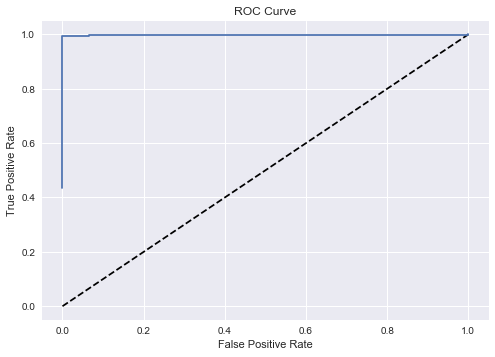

In [137]:
#ROC curves provide a way to visually evaluate models
# Compute predicted probabilities: y_pred_prob
y_pred_prob = clf_l.predict_proba(Xtest_l)[:,1]
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(ytest_l, y_pred_prob)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [138]:
y_pred_prob = clf_l.predict_proba(Xtest_l)[:,1]
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(ytest_l, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(clf_l, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))



AUC: 0.9970030738573011
AUC scores computed using 5-fold cross-validation: [ 0.98999287  1.          0.99900299  1.          0.99601196]


In [139]:
print(classification_report(ytest_l, (y_pred_prob).astype(int)))

             precision    recall  f1-score   support

          0       0.71      1.00      0.83      2890
          1       1.00      0.43      0.61      2042

avg / total       0.83      0.77      0.74      4932



In [140]:
print(clf_l.coef_)


[[ -4.86615486e-02  -5.69107553e-01  -1.74308628e-02   3.41566204e-02
    3.72551824e-04  -1.76249069e-02   4.35025638e-02   1.17016535e-01
    1.84808316e-01   3.22828842e-01   2.01560748e-02   6.31581968e-05
    8.08871351e-05  -4.86890403e-01  -4.78394758e-01   3.11350367e-02
    2.07154431e-02  -6.35157470e-03  -3.39825792e-02  -5.44230227e-01
    0.00000000e+00]]


In [141]:
print (len(Xtrain_l))
print(len(ytrain_l))
print(len(Xtest_l))
print(len(ytest_l))
print(len(X))
print(len(y))
print(np.mean(ytest_l))
print(np.sum(ytest_l==1))

7398
7398
4932
4932
12330
12330
0.41403081914
2042


Apply ML model to the test set

In [142]:
backorder_test=pd.read_csv("Kaggle_Test_Dataset_v2.csv")
test = (backorder_test
              .replace(['Yes', 'No'], [1, 0]))               # make yes/no numeric

C:\Users\Hedi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [143]:
test['lead_time'] = Imputer(strategy='median').fit_transform(
                                    test['lead_time'].values.reshape(-1, 1))
test = test.dropna()
for col in ['perf_6_month_avg', 'perf_12_month_avg']:
    test[col] = Imputer(missing_values=-99).fit_transform(
                                    test[col].values.reshape(-1, 1))

In [144]:
test.isnull().sum().sum()

0

In [145]:
len(test[test['lead_time']==1])/len(test['lead_time'])

1.23928534545079e-05

#### 2. Random Forest

In [146]:
target=['went_on_backorder']
features=['national_inv','lead_time','in_transit_qty','forecast_3_month','forecast_6_month','forecast_9_month',
   'sales_1_month','sales_3_month','sales_6_month','sales_9_month','min_bank','potential_issue',
   'pieces_past_due','perf_6_month_avg','perf_12_month_avg','local_bo_qty','deck_risk',
   'oe_constraint','ppap_risk','stop_auto_buy','rev_stop']

In [147]:
X = df2[features]
#X = sample_nomiss[features].values
y = df2['went_on_backorder'].values

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state=42)

In [148]:
forest = ensemble.RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2)
forest.fit(Xtrain, ytrain)
# Print the score of the fitted random forest
print(forest.score(Xtrain, ytrain))

# Compute predictions on our test set features then print the length of the prediction vector
pred_forest =forest.predict(Xtest)
print(len(pred_forest))
print(classification_report(ytest, pred_forest))


0.999594484996
2466
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1500
          1       1.00      0.99      1.00       966

avg / total       1.00      1.00      1.00      2466



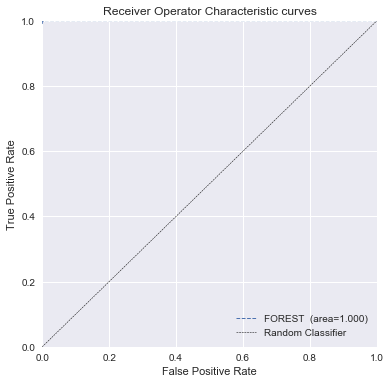

In [149]:
def roc_auc_plot(ytrue, pred_forest, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(ytrue, pred_forest[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(ytrue, pred_forest[:,1])))

f, ax = plt.subplots(figsize=(6,6))

roc_auc_plot(ytest,forest.predict_proba(Xtest),label='FOREST ',l='--')


ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        label='Random Classifier')    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()
plt.show()


In [150]:
#Area under ROC:Large area under ROC curve the better our model is(AUC)
#Compute AUC
# If the AUC is greater than 0.5, the model is better than random guessing
# Compute predicted probabilities: y_pred_prob
y_pred_prob = forest.predict_proba(Xtest)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(ytest, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(forest, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.9999813664596273
AUC scores computed using 5-fold cross-validation: [ 0.99197741  1.          1.          1.          1.        ]


In [151]:
print(forest.feature_importances_)

[  9.05538840e-02   1.02672884e-04   1.10829353e-03   1.96160081e-02
   6.76183465e-04   1.86259077e-01   1.74388430e-01   2.59103954e-01
   9.26241537e-04   2.02536470e-01   4.79099961e-02   0.00000000e+00
   1.28770630e-04   2.66376819e-04   4.29411627e-04   1.46794193e-02
   1.07234124e-03   0.00000000e+00   2.42468432e-04   0.00000000e+00
   0.00000000e+00]


The most important features(higher coficient) are national inventory,forecast_6_month and local quantity

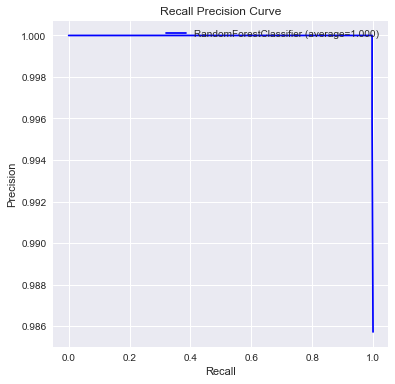

In [152]:
fig , ax1 = plt.subplots(figsize=(6,6) )
estimators =[forest]
classifiers=['RandomForestClassifier']
colors = ['b']
for i, estimator in enumerate(estimators):
    y_proba = estimator.predict_proba(Xtest)[:,1]
    precision, recall, _ = precision_recall_curve(ytest,y_proba)
    average_precision= average_precision_score(ytest, y_proba, average="micro")
    plt.plot(recall, precision, label='%s (average=%.3f)'%(classifiers[i],average_precision), color=colors[i])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc=1)
plt.title('Recall Precision Curve')
plt.show()

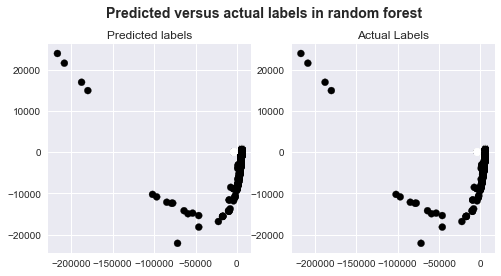

In [153]:
# Import `Isomap()`
from sklearn.manifold import Isomap

# Create an isomap and fit the `digits` data to it
X_iso = Isomap(n_neighbors=10).fit_transform(Xtrain)

# Compute cluster centers and predict cluster index for each sample
predicted = forest.predict(Xtrain)

# Create a plot with subplots in a grid of 1X2
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Adjust the layout
fig.subplots_adjust(top=0.85)

# Add scatterplots to the subplots 
ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=predicted)
ax[0].set_title('Predicted labels')
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=ytrain)
ax[1].set_title('Actual Labels')


# Add title
fig.suptitle('Predicted versus actual labels in random forest', fontsize=14, fontweight='bold')

# Show the plot
plt.show()



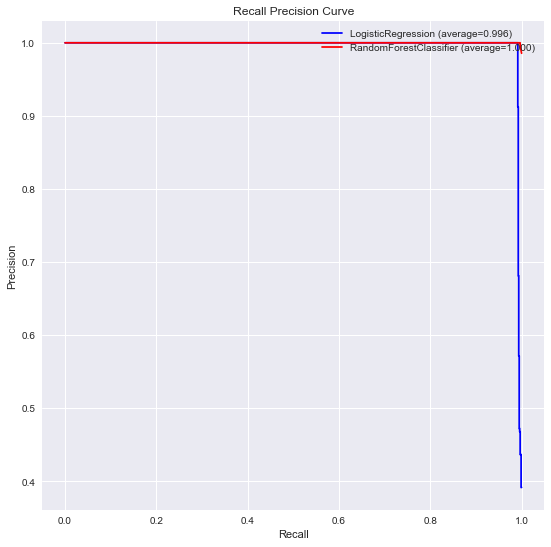

In [154]:
#plot Recall-Precision Curves
fig , ax1 = plt.subplots(figsize=(9,9) )
estimators =[clf_l, forest]
classifiers=['LogisticRegression', 'RandomForestClassifier']
colors = ['b', 'r']
for i, estimator in enumerate(estimators):
    y_pred_prob = estimator.predict_proba(Xtest)[:,1]
    precision, recall, _ = precision_recall_curve(ytest,y_pred_prob)
    average_precision= average_precision_score(ytest, y_pred_prob, average="micro")
    plt.plot(recall, precision, label='%s (average=%.3f)'%(classifiers[i],average_precision), color=colors[i])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc=1)
plt.title('Recall Precision Curve')
plt.show()